In [22]:

# Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import numpy as np
import json
import sklearn 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



In [23]:
# note that here I used the mini corpus with 100,000 datapoints for computational reasons
clean_corpus = pd.read_csv('/home/theresa/Desktop/DataSets/clean_mini_corpus.csv')

In [24]:
# there may be some missing values in cleantext; drop those
clean_corpus.dropna(inplace = True)

In [25]:
clean_corpus.shape

(99969, 2)

In [26]:

# Split the data for training (90% of data) and testing (10% of data)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clean_corpus['CleanText'],
                                                    clean_corpus['Sentiment'],test_size=0.1)

In [27]:
X_train[1]

'miss alex dinner fam'

In [28]:
print (X_train.shape, X_test.shape, Y_train.shape , Y_test.shape)

(89972,) (9997,) (89972,) (9997,)


In [29]:
# For after we create a bag of words for training data

from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:

# Initialize the "TfidfVectorizer" object, which is sklearn's refined bag of words tool.  
# It first divides the number of occurrences of each word in a document by the total number of words in the document: 
# these new features are called tf for Term Frequencies.
# Another refinement on top of tf is to downscale weights for the less informative words that occur in the corpus
# compared to those that occur only in a smaller portion of the corpus.
# This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

vectorizer = TfidfVectorizer(analyzer = "word",tokenizer = None,preprocessor = None, stop_words = None,
                             max_features = 5000)

In [31]:

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our 
# training data into feature vectors. 

# The input to fit_transform should be a list of strings.
X_train_list = X_train.tolist()

# now we can use the fit_transform function
train_data_features = vectorizer.fit_transform(X_train_list)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

print ('train_data_features done')

train_data_features done


In [32]:
vectorizer.get_feature_names()[1127]

'describe'

In [33]:
X_train_list[11]

'macguyver remake'

In [34]:
np.argmax(train_data_features[11])

0

In [35]:

# Get a bag of words for the test set, and convert to a numpy array

X_test_list = X_test.tolist()

# VERY IMPORTANT: On test data, we ONLY use transform... we DO NOT FIT IT! 
test_data_features = vectorizer.transform(X_test_list)
test_data_features = test_data_features.toarray()

print ('test_data_features done')

test_data_features done


In [36]:
train_data_features.shape

(89972, 5000)

In [37]:
test_data_features.shape

(9997, 5000)

In [38]:
Y_test.mean() # null error rate

0.4998499549864959

Multinomial Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial NB classifier 
mnb = MultinomialNB() 

# Fit the MNB classifier to the training set, using the bag of words as features and the sentiment labels as the 
# response variable

# This may take a few minutes to run
#on my machine, it took only a couple of seconds...suspicious!
mnb = mnb.fit( train_data_features, Y_train )

mnb_test_pred = mnb.predict(test_data_features)

In [47]:

# MNB test accuracy 

mnb_test_score = mnb.score(test_data_features, Y_test)

print (mnb_test_score)

0.748824647394


In [48]:

from sklearn import metrics
from sklearn.cross_validation import cross_val_score



In [49]:
print (metrics.confusion_matrix(Y_test, mnb_test_pred))
print (metrics.classification_report(Y_test, mnb_test_pred))

[[3833 1167]
 [1344 3653]]
             precision    recall  f1-score   support

          0       0.74      0.77      0.75      5000
          1       0.76      0.73      0.74      4997

avg / total       0.75      0.75      0.75      9997



Sentiment analysis of United Tweets  

In [50]:

clean_tweets = pd.read_csv('/home/theresa/Desktop/DataSets/UnitedTweets/AllUnitedTweetsClean.csv') 
clean_tweets.columns

Index(['created_at', 'text', 'CleanText'], dtype='object')

In [51]:
clean_tweets = clean_tweets.drop('text', axis=1);

In [52]:
# there may be some missing values in some of the entries, so drop the entries 
clean_tweets.dropna(inplace = True)

In [53]:
# The input to transform should be a list of strings.
tweet_list = clean_tweets['CleanText'].values.tolist()

In [54]:
tweet_list[0:5]

['nathanoafc kfcbarstool rumour sea lion works united airlines',
 'iamjohnk aminespn united airlines flight full see security walking toward seat fsw ywic',
 'united hold customer representative minutes want know get destination flight canellation',
 'kevwodonnell would appear snp taking pr advice united airlines run leaders debate mess',
 'oldpicsarchive united airlines stewardess wi mabgee']

In [55]:

# get the bag of words on the rockets tweets
tweet_data_features = vectorizer.transform(tweet_list)

In [56]:

tweet_data_features.shape

(69216, 5000)

In [57]:
tweet_data_features = tweet_data_features.toarray() 

In [58]:
# now run the MNB model to predict sentiment values for the derby

mnb_tweet_pred = mnb.predict(tweet_data_features)

In [59]:
mnb_tweet_pred[0:5]

array([1, 0, 0, 0, 0])

In [60]:
clean_tweets['Sentiment'] = mnb_tweet_pred

In [61]:
clean_tweets[0:15]

,created_at,CleanText,Sentiment
0,{'$date': '2017-05-22T13:32:08.000Z'},nathanoafc kfcbarstool rumour sea lion works u...,1
1,{'$date': '2017-05-22T13:32:31.000Z'},iamjohnk aminespn united airlines flight full ...,0
2,{'$date': '2017-05-22T13:33:28.000Z'},united hold customer representative minutes wa...,0
3,{'$date': '2017-05-22T13:33:32.000Z'},kevwodonnell would appear snp taking pr advice...,0
4,{'$date': '2017-05-22T13:33:39.000Z'},oldpicsarchive united airlines stewardess wi m...,0
5,{'$date': '2017-05-22T13:34:19.000Z'},edisonfairs united flylaxairport society scien...,1
6,{'$date': '2017-05-22T13:36:06.000Z'},let chat check pinned post ulnjhr fzc,1
7,{'$date': '2017-05-22T13:36:13.000Z'},cust serv puts earlier flight gate agent objec...,0
8,{'$date': '2017-05-22T13:36:27.000Z'},flying united complete nightmare hour delay fl...,0
9,{'$date': '2017-05-22T13:37:21.000Z'},dammmncam united airlines excuse sir would min...,0


In [62]:
pos = clean_tweets[clean_tweets['Sentiment'] == 1]

In [63]:
pos.shape


(25527, 3)

In [64]:
neg = clean_tweets[clean_tweets['Sentiment'] == 0]


In [65]:
neg.shape

(43689, 3)

In [66]:
clean_tweets.to_csv('UnitedTweetCorpus_sentiment.csv',index = False)

In [67]:
clean_tweets['Sentiment Category'] = clean_tweets.Sentiment.map({0: "Negative", 1: "Positive"})

In [68]:
clean_tweets.head()

,created_at,CleanText,Sentiment,Sentiment Category
0,{'$date': '2017-05-22T13:32:08.000Z'},nathanoafc kfcbarstool rumour sea lion works u...,1,Positive
1,{'$date': '2017-05-22T13:32:31.000Z'},iamjohnk aminespn united airlines flight full ...,0,Negative
2,{'$date': '2017-05-22T13:33:28.000Z'},united hold customer representative minutes wa...,0,Negative
3,{'$date': '2017-05-22T13:33:32.000Z'},kevwodonnell would appear snp taking pr advice...,0,Negative
4,{'$date': '2017-05-22T13:33:39.000Z'},oldpicsarchive united airlines stewardess wi m...,0,Negative


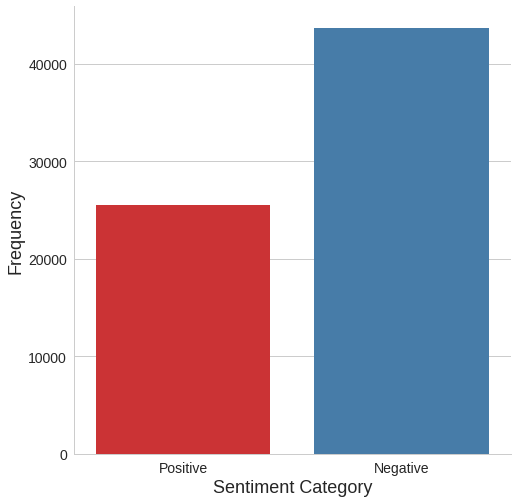

In [69]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets,palette='Set1', size = 7, aspect = 1, kind="count")

plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

Sentiment Analysis using Textblob
Textblob is built on top of NLTK and Pattern libraries. It is trained on a lexicon of adjectives that occur 
frequently in product reviews. For any string of text, it returns a sentiment polarity score (-1.0 to 1.0, 
negative to positive).

In [70]:
from textblob import TextBlob, Word


In [71]:
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in clean_tweets['CleanText']]


In [72]:
print (clean_tweets['CleanText'][0:15], sentiments[0:15])

0     nathanoafc kfcbarstool rumour sea lion works u...
1     iamjohnk aminespn united airlines flight full ...
2     united hold customer representative minutes wa...
3     kevwodonnell would appear snp taking pr advice...
4     oldpicsarchive united airlines stewardess wi m...
5     edisonfairs united flylaxairport society scien...
6                 let chat check pinned post ulnjhr fzc
7     cust serv puts earlier flight gate agent objec...
8     flying united complete nightmare hour delay fl...
9     dammmncam united airlines excuse sir would min...
10    summer fort lauderdale vancouver canada roundt...
11    secretflying summer fort lauderdale vancouver ...
12    find helpful united employees baggage claim tr...
13                          byronvalle hozay tinglkpu w
14                    wxkellysmith united airlines days
Name: CleanText, dtype: object [0.0, 0.35, 0.0, -0.175, 0.0, 0.35714285714285715, 0.0, 0.16666666666666666, 0.1, -0.05, 0.0, 0.0, 0.0, 0.0, 0.0]


In [73]:

avg_sentiment = np.sum(sentiments)/len(sentiments)
print (avg_sentiment)

0.0378058844122


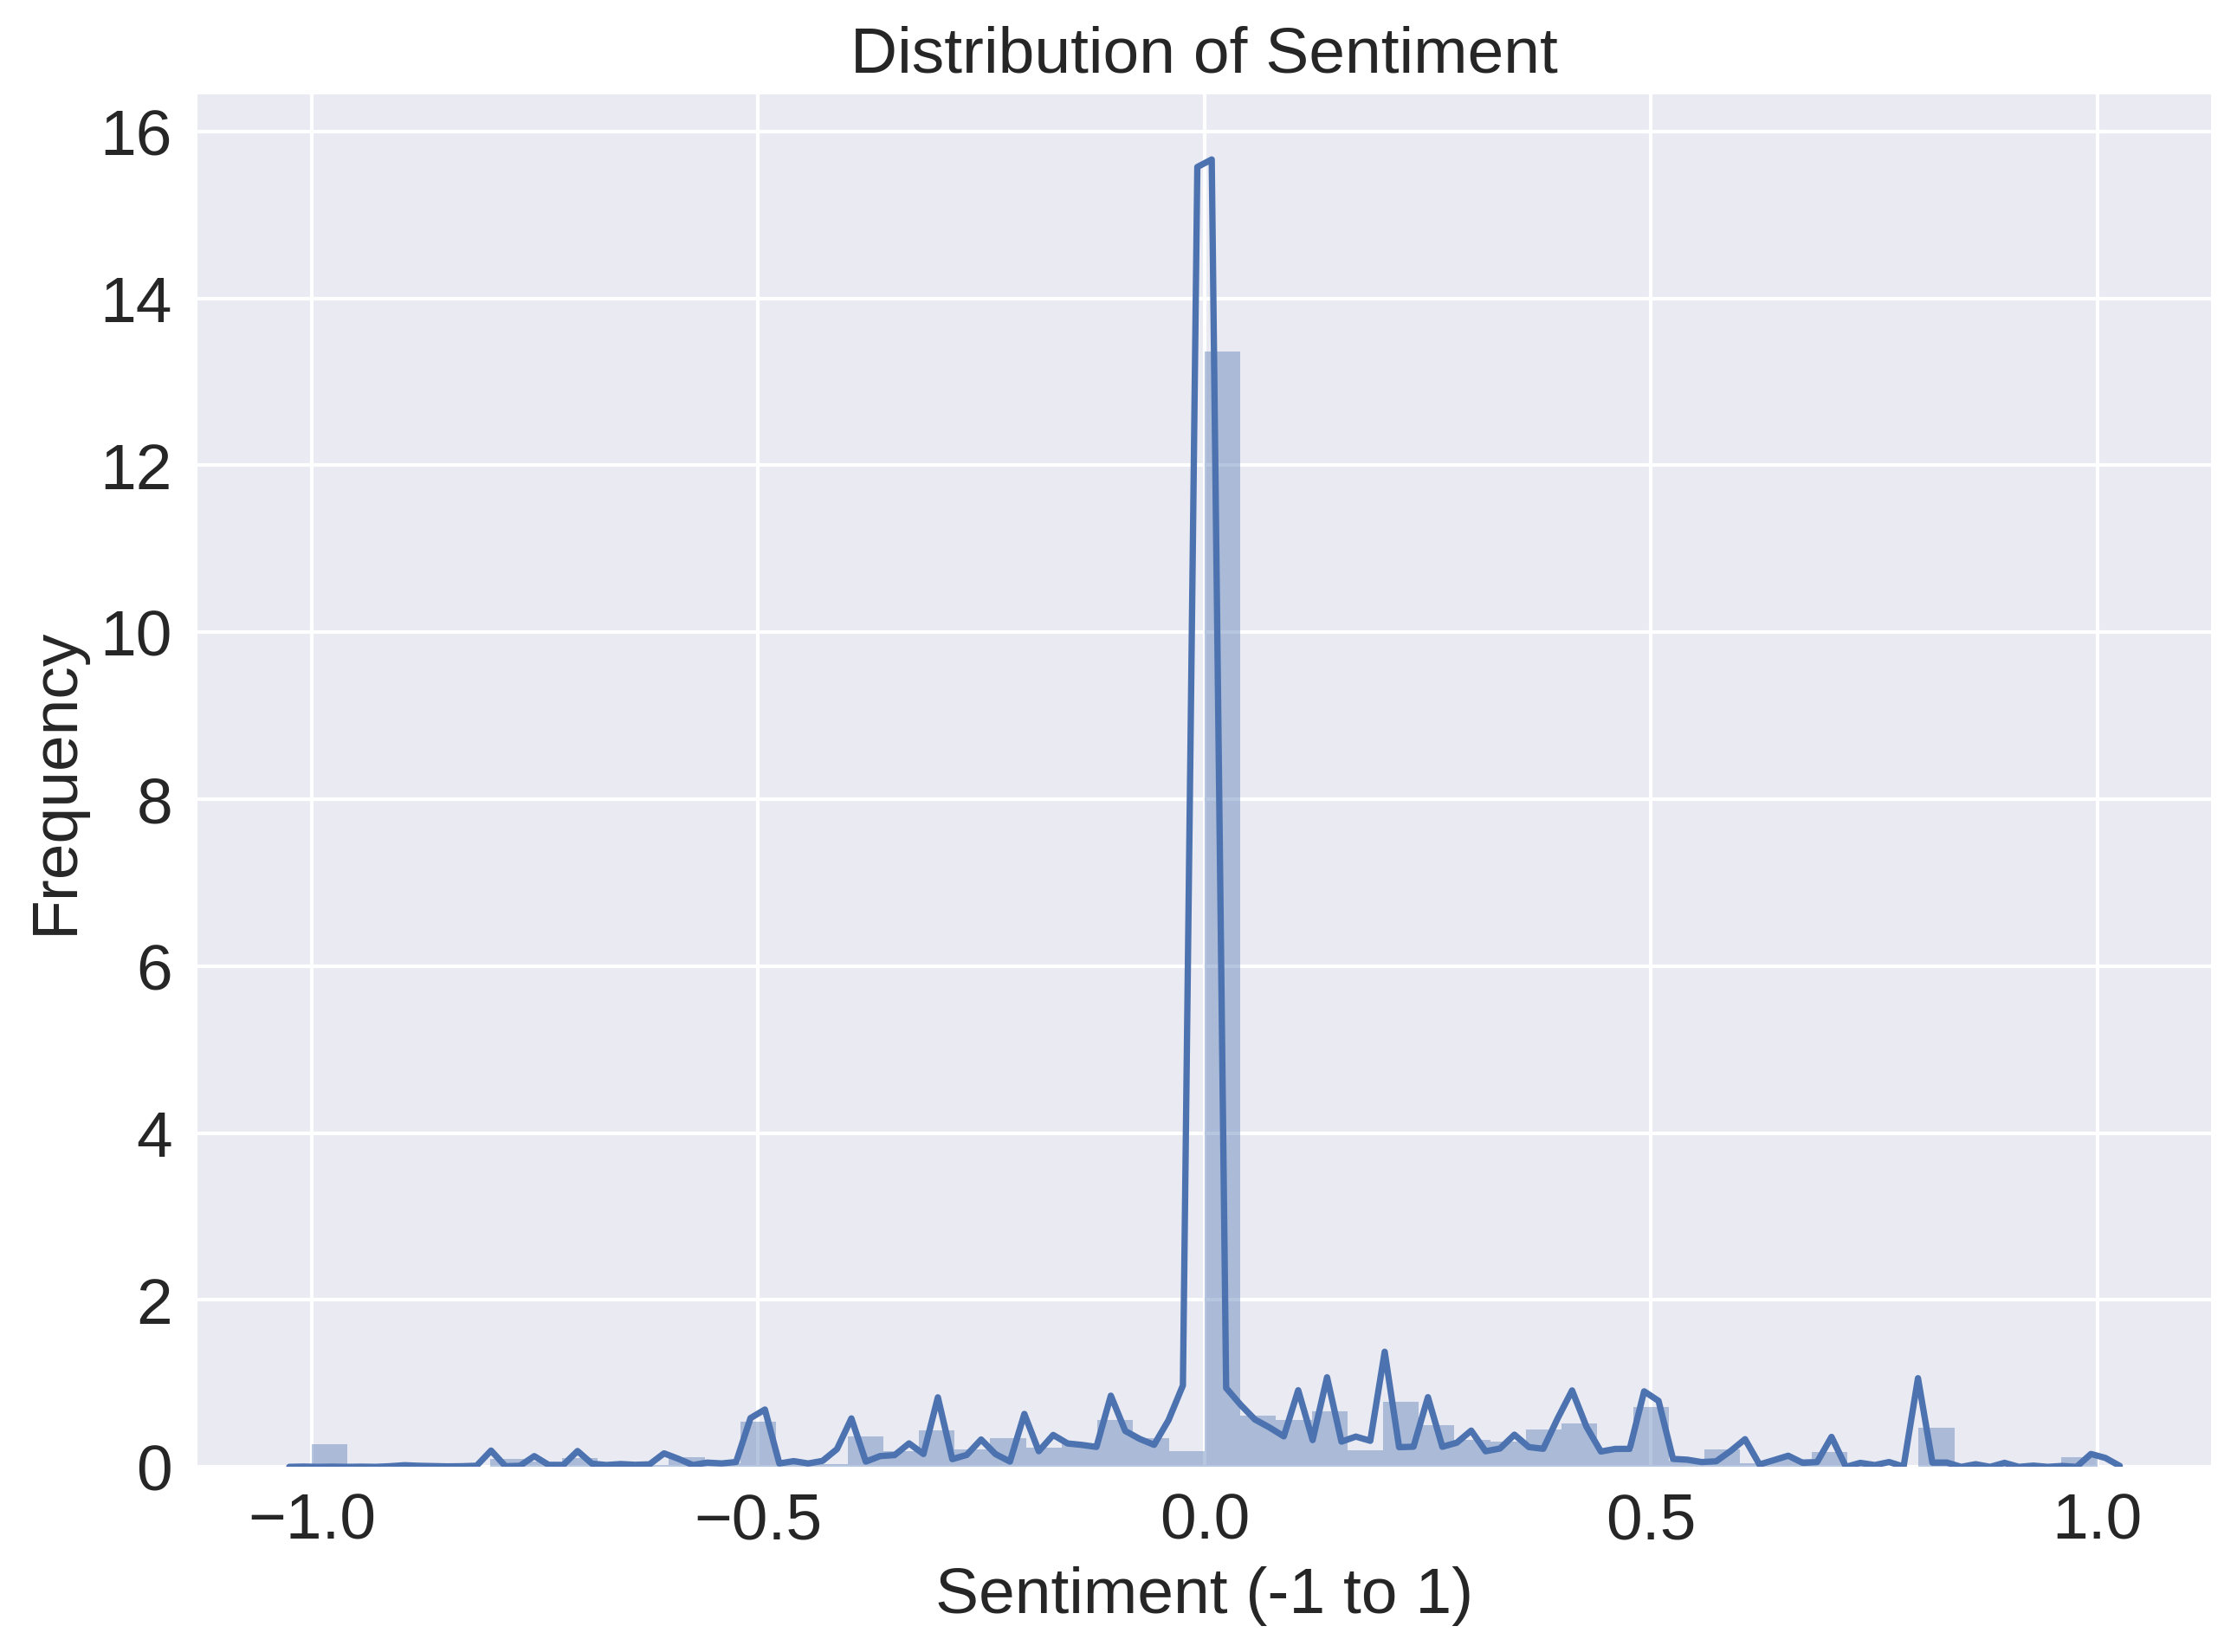

In [74]:
sns.set_style('darkgrid')
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.distplot(sentiments)
plt.title('Distribution of Sentiment', fontsize = 18)
plt.xlabel('Sentiment (-1 to 1)')
plt.ylabel('Frequency')
plt.show()

In [75]:

# Loop through all of the sentiments and put them into the appropriate group
pos_neg_neutral = []
for sentiment in sentiments:
    if sentiment <= -0.25:
        pos_neg_neutral.append('Negative')
    elif sentiment >= 0.25:
        pos_neg_neutral.append('Positive')
    elif sentiment > -0.25 and sentiment < 0.25:
        pos_neg_neutral.append('Neutral')
clean_tweets['Sentiment Category'] = np.array(pos_neg_neutral)

In [76]:
clean_tweets[0:5]

,created_at,CleanText,Sentiment,Sentiment Category
0,{'$date': '2017-05-22T13:32:08.000Z'},nathanoafc kfcbarstool rumour sea lion works u...,1,Neutral
1,{'$date': '2017-05-22T13:32:31.000Z'},iamjohnk aminespn united airlines flight full ...,0,Positive
2,{'$date': '2017-05-22T13:33:28.000Z'},united hold customer representative minutes wa...,0,Neutral
3,{'$date': '2017-05-22T13:33:32.000Z'},kevwodonnell would appear snp taking pr advice...,0,Neutral
4,{'$date': '2017-05-22T13:33:39.000Z'},oldpicsarchive united airlines stewardess wi m...,0,Neutral


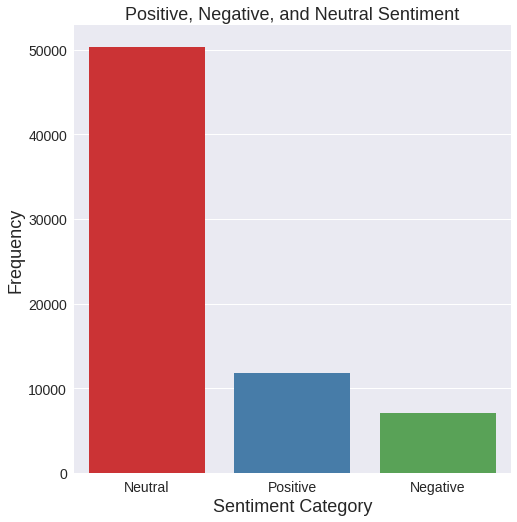

In [77]:
sns.set_style('darkgrid')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets, size = 7, aspect = 1, palette = 'Set1', kind='count')
plt.title('Positive, Negative, and Neutral Sentiment', fontsize = 18)
plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

In [78]:

clean_tweets['Sentiment'] = sentiments

In [79]:
clean_tweets.head()

,created_at,CleanText,Sentiment,Sentiment Category
0,{'$date': '2017-05-22T13:32:08.000Z'},nathanoafc kfcbarstool rumour sea lion works u...,0.000,Neutral
1,{'$date': '2017-05-22T13:32:31.000Z'},iamjohnk aminespn united airlines flight full ...,0.350,Positive
2,{'$date': '2017-05-22T13:33:28.000Z'},united hold customer representative minutes wa...,0.000,Neutral
3,{'$date': '2017-05-22T13:33:32.000Z'},kevwodonnell would appear snp taking pr advice...,-0.175,Neutral
4,{'$date': '2017-05-22T13:33:39.000Z'},oldpicsarchive united airlines stewardess wi m...,0.000,Neutral


In [80]:
clean_tweets.to_csv('UnitedTweet_sentiment_polarity.csv',index = False)